In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np
import sklearn as sk
from arboreto.utils import load_tf_names

In [ ]:
#Load the metadata
metadata = pd.read_csv('../data/seurat.integrated.5Ht_6Ho.metadata.csv',index_col = 0)

#Laod the counts data
count_data = pd.read_csv('../data/seurat.integrated.5Ht_6Ho.counts.csv',index_col = 0)

#Rename the index of the count data for easy processing
count_data = count_data.T
count_data.index.name = 'cell'

#Create an anndata object for simple usage
adata = ad.AnnData(X=count_data, obs = metadata)
#Save the anndata object if necessary
#adata.write_h5ad('../processed_data/original_data_adata.h5ad')

In [ ]:
#Save/Read the anndata if necessary
#adata = sc.read_h5ad('../data/original_data_adata.h5ad')

In [4]:
#Basic Exploratory data analysis
nCountsPerGene = np.sum(adata.X, axis=0)
nCellsPerGene = np.sum(adata.X>0, axis=0)

# Show info
print("Number of counts (in the dataset units) per gene:", nCountsPerGene.min(), " - " ,nCountsPerGene.max())
print("Number of cells in which each gene is detected:", nCellsPerGene.min(), " - " ,nCellsPerGene.max())

Number of counts (in the dataset units) per gene: 0  -  16881977
Number of cells in which each gene is detected: 0  -  12472


In [5]:
nCells=adata.X.shape[0]

# pySCENIC thresholds
minCountsPerGene=3*.01*nCells # 3 counts in 1% of cells
print("minCountsPerGene: ", minCountsPerGene)

minSamples=.01*nCells # 1% of cells
print("minSamples: ", minSamples)

minCountsPerGene:  374.15999999999997
minSamples:  124.72


In [6]:
# simply compute the number of genes per cell (computers 'n_genes' column)
sc.pp.filter_cells(adata, min_genes=0)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [7]:
metadata = adata.obs
metadata

,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mt,percent.rb,percent.hb,umi_per_gene,RNA_snn_res.0.8,seurat_clusters,...,integrated_snn_res.0.5,integrated_snn_res.1,integrated_snn_res.1.5,integrated_snn_res.2,S.Score,G2M.Score,cell_cycle_seurat,cluster1,n_genes,n_counts
cell,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGAAGCGGG-1_1,5Ht,3380,1351,5Ht,3.165680,11.686391,0.000000,2.501850,4,10,...,0,1,1,10,0.011845,-0.015551,S,Mammary epithelial cells-Basal,1351,3380
AAACCCAAGCCTGGAA-1_1,5Ht,3176,883,5Ht,2.802267,3.935768,0.000000,3.596829,0,11,...,2,11,9,11,-0.014581,-0.024530,G1,Mammary epithelial cells-Luminal,883,3176
AAACCCAAGGCGTTAG-1_1,5Ht,659,363,5Ht,3.490137,8.952959,0.000000,1.815427,7,12,...,9,8,11,12,-0.015447,-0.014663,G1,Mammary epithelial cells-Luminal,363,659
AAACCCACAACAGCCC-1_1,5Ht,8157,2424,5Ht,3.334559,17.408361,0.024519,3.365099,8,13,...,0,10,12,13,-0.054866,-0.009785,G1,Mammary epithelial cells-Basal,2424,8157
AAACCCACACCGGTCA-1_1,5Ht,8476,2283,5Ht,2.430392,14.098631,0.000000,3.712659,2,0,...,1,0,0,0,-0.016374,-0.057771,G1,Monocytes-macrophages,2283,8476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAACTGCCG-1_2,6Ho,11756,3186,6Ho,6.141545,16.357605,0.008506,3.689893,10,5,...,2,9,6,5,-0.077424,-0.033610,G1,Mammary epithelial cells-Luminal,3186,11756
TTTGTTGCAGCACACC-1_2,6Ho,3271,1398,6Ho,4.616325,4.494039,0.000000,2.339771,2,8,...,3,5,5,8,0.008202,-0.054715,S,3,1398,3271
TTTGTTGCAGCGGATA-1_2,6Ho,20183,5323,6Ho,4.701977,13.570827,0.014864,3.791659,8,37,...,2,30,35,37,0.438031,0.475055,G2M,Mammary epithelial cells-Luminal,5323,20183


In [8]:
#Subset the metadata based on mouse type
ht_metadata = metadata[metadata['orig.ident'] == '5Ht']
ho_metadata = metadata[metadata['orig.ident'] == '6Ho']

In [9]:
ht_index_values = ht_metadata.index.tolist()
ho_index_values = ho_metadata.index.tolist()
# Slice the adata object based on index values
ht_adata = adata[adata.obs.index.isin(ht_index_values)]
ho_adata = adata[adata.obs.index.isin(ho_index_values)]

In [26]:
#Save these files as well - if needed
ht_adata.write_h5ad('../data/ht_adata.h5ad')
ho_adata.write_h5ad('../data/ho_adata.h5ad')

In [2]:
#Read files for processing - if needed
ht_adata = sc.read_h5ad('../data/ht_adata.h5ad')
ho_adata = sc.read_h5ad('../data/ho_adata.h5ad')

In [3]:
ho_adata

AnnData object with n_obs × n_vars = 4840 × 19140
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.rb', 'percent.hb', 'umi_per_gene', 'RNA_snn_res.0.8', 'seurat_clusters', 'mt_filter', 'feature_filter', 'doublet_filter', 'qualtiy_filters', 'RNA_snn_res.0.5', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.5', 'integrated_snn_res.1', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'S.Score', 'G2M.Score', 'cell_cycle_seurat', 'cluster1', 'n_genes', 'n_counts'

In [4]:
# Data pre-processing step 1
#Keep cells that express at least 200 genes
sc.pp.filter_cells(ht_adata, min_genes=200 )
#Keep cells that express less than 5000 genes
sc.pp.filter_cells(ht_adata, max_genes=5000 )
#Keep genes that are expressed in atleast 3 cells
sc.pp.filter_genes(ht_adata, min_cells=3 )
#Keep cells that express atleast 200 genes
sc.pp.filter_cells(ho_adata, min_genes=200 )
#Keep cells that express atmost 5000 genes
sc.pp.filter_cells(ho_adata, max_genes=5000 )
#Remove genes that express less than 3 cells
sc.pp.filter_genes(ho_adata, min_cells=3 )

In [5]:
ht_adata

AnnData object with n_obs × n_vars = 7624 × 18433
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.rb', 'percent.hb', 'umi_per_gene', 'RNA_snn_res.0.8', 'seurat_clusters', 'mt_filter', 'feature_filter', 'doublet_filter', 'qualtiy_filters', 'RNA_snn_res.0.5', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.5', 'integrated_snn_res.1', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'S.Score', 'G2M.Score', 'cell_cycle_seurat', 'cluster1', 'n_genes', 'n_counts'
    var: 'n_cells'

In [6]:
ho_adata

AnnData object with n_obs × n_vars = 4757 × 18052
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.rb', 'percent.hb', 'umi_per_gene', 'RNA_snn_res.0.8', 'seurat_clusters', 'mt_filter', 'feature_filter', 'doublet_filter', 'qualtiy_filters', 'RNA_snn_res.0.5', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.5', 'integrated_snn_res.1', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'S.Score', 'G2M.Score', 'cell_cycle_seurat', 'cluster1', 'n_genes', 'n_counts'
    var: 'n_cells'

In [7]:
#Take union of genes after filtering from both datasets
filtered_genes = set(ht_adata.var_names).intersection(set(ho_adata.var_names))
filtered_cells = set(ht_adata.obs_names).union(ho_adata.obs_names)
len(filtered_cells)

12381

In [8]:
len(filtered_genes)

17507

In [9]:
different_genes_6ho = set(ho_adata.var_names).difference(filtered_genes) 
different_genes_5ht = set(ht_adata.var_names).difference(filtered_genes) 

filtered_different_genes_6ho = [] #Remove genes in the difference of 6ho and the intersection that have Rik or Gm
filtered_different_genes_5ht = [] #Remove genes in the difference of 5ht and the intersection that have Rik or Gm
filtered_genes_intersection = [] #Remove genes in the intersection that have Rik or Gm
for gene in different_genes_6ho:
    if not (gene.startswith('Gm') or gene.endswith('Rik') or ('Rik' in gene)):
        filtered_different_genes_6ho.append(gene)
for gene in different_genes_5ht:
    if not (gene.startswith('Gm') or gene.endswith('Rik') or ('Rik' in gene)):
        filtered_different_genes_5ht.append(gene)
for gene in filtered_genes:
    if not (gene.startswith('Gm') or gene.endswith('Rik') or ('Rik' in gene)):
        filtered_genes_intersection.append(gene)

filtered_genes_all = set(filtered_genes_intersection + filtered_different_genes_6ho + filtered_different_genes_5ht)

In [10]:
len(filtered_genes_all)

15732

In [13]:
#Load the data again to subset
ht_adata = sc.read_h5ad('../data/ht_adata.h5ad')
ho_adata = sc.read_h5ad('../data/ho_adata.h5ad')

In [14]:
#Finally subset the data based on filtered cells and genes
ht_adata = ht_adata[ht_adata.obs_names.isin(filtered_cells)]
ho_adata = ho_adata[ho_adata.obs_names.isin(filtered_cells)]
ht_adata = ht_adata[:,list(filtered_genes_all)]
ho_adata = ho_adata[:,list(filtered_genes_all)]

In [15]:
#Save these files as well
ht_adata.write_h5ad('../data/ht_adata_filtered_5ht6ho_intersection.h5ad')
ho_adata.write_h5ad('../data/ho_adata_filtered_5ht6ho_intersection.h5ad')

In [16]:
ht_adata

View of AnnData object with n_obs × n_vars = 7624 × 15732
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.rb', 'percent.hb', 'umi_per_gene', 'RNA_snn_res.0.8', 'seurat_clusters', 'mt_filter', 'feature_filter', 'doublet_filter', 'qualtiy_filters', 'RNA_snn_res.0.5', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.5', 'integrated_snn_res.1', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'S.Score', 'G2M.Score', 'cell_cycle_seurat', 'cluster1', 'n_genes', 'n_counts'

In [17]:
ho_adata

View of AnnData object with n_obs × n_vars = 4757 × 15732
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.rb', 'percent.hb', 'umi_per_gene', 'RNA_snn_res.0.8', 'seurat_clusters', 'mt_filter', 'feature_filter', 'doublet_filter', 'qualtiy_filters', 'RNA_snn_res.0.5', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.5', 'integrated_snn_res.1', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'S.Score', 'G2M.Score', 'cell_cycle_seurat', 'cluster1', 'n_genes', 'n_counts'

In [18]:
#If kernal dies, read data again
#ht_adata = sc.read_h5ad('../data/ht_adata_filtered_5ht6ho_intersection.h5ad')
ht_adata.X = ht_adata.X.astype(float)

In [19]:
#If kernel dies, read data again
#ho_adata = sc.read_h5ad('../data/ho_adata_filtered_5ht6ho_intersection.h5ad')
ho_adata.X = ho_adata.X.astype(float)

In [2]:
# Combine 5ht and 6Ho before finding differentially expressed genes.
ht_adata = sc.read_h5ad('../data/ht_adata_filtered_5ht6ho_intersection.h5ad')
ho_adata = sc.read_h5ad('../data/ho_adata_filtered_5ht6ho_intersection.h5ad')
combined_adata = sc.concat([ht_adata, ho_adata], join='outer')
combined_adata.write_h5ad('../data/combined_data_filtered_5ht6ho_intersection.h5ad')

In [3]:
combined_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mt,percent.rb,percent.hb,umi_per_gene,RNA_snn_res.0.8,seurat_clusters,...,integrated_snn_res.0.5,integrated_snn_res.1,integrated_snn_res.1.5,integrated_snn_res.2,S.Score,G2M.Score,cell_cycle_seurat,cluster1,n_genes,n_counts
cell,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGAAGCGGG-1_1,5Ht,3380,1351,5Ht,3.165680,11.686391,0.000000,2.501850,4,10,...,0,1,1,10,0.011845,-0.015551,S,Mammary epithelial cells-Basal,1351,3380
AAACCCAAGCCTGGAA-1_1,5Ht,3176,883,5Ht,2.802267,3.935768,0.000000,3.596829,0,11,...,2,11,9,11,-0.014581,-0.024530,G1,Mammary epithelial cells-Luminal,883,3176
AAACCCAAGGCGTTAG-1_1,5Ht,659,363,5Ht,3.490137,8.952959,0.000000,1.815427,7,12,...,9,8,11,12,-0.015447,-0.014663,G1,Mammary epithelial cells-Luminal,363,659
AAACCCACAACAGCCC-1_1,5Ht,8157,2424,5Ht,3.334559,17.408361,0.024519,3.365099,8,13,...,0,10,12,13,-0.054866,-0.009785,G1,Mammary epithelial cells-Basal,2424,8157
AAACCCACACCGGTCA-1_1,5Ht,8476,2283,5Ht,2.430392,14.098631,0.000000,3.712659,2,0,...,1,0,0,0,-0.016374,-0.057771,G1,Monocytes-macrophages,2283,8476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGCACTAG-1_2,6Ho,4882,1524,6Ho,2.068824,21.179844,0.000000,3.203412,7,3,...,7,4,4,3,-0.027189,-0.015633,G1,7,1524,4882
TTTGTTGCAACTGCCG-1_2,6Ho,11756,3186,6Ho,6.141545,16.357605,0.008506,3.689893,10,5,...,2,9,6,5,-0.077424,-0.033610,G1,Mammary epithelial cells-Luminal,3186,11756
TTTGTTGCAGCACACC-1_2,6Ho,3271,1398,6Ho,4.616325,4.494039,0.000000,2.339771,2,8,...,3,5,5,8,0.008202,-0.054715,S,3,1398,3271


In [4]:
tfs = load_tf_names('../data/allTFs_mm.txt')
#Only retain tfs that are good:
# tfs = list(set(ho_adata.var_names).intersection(tfs)) #can use ho_adata or ht_adata - both have the same gene set.

In [5]:
len(set(combined_adata.var_names).intersection(tfs))

1434

In [6]:
len(set(ho_adata.var_names).intersection(tfs))

1434

In [7]:
len(set(ht_adata.var_names).intersection(tfs))

1434

# Find highly variable genes for the combined ADATA

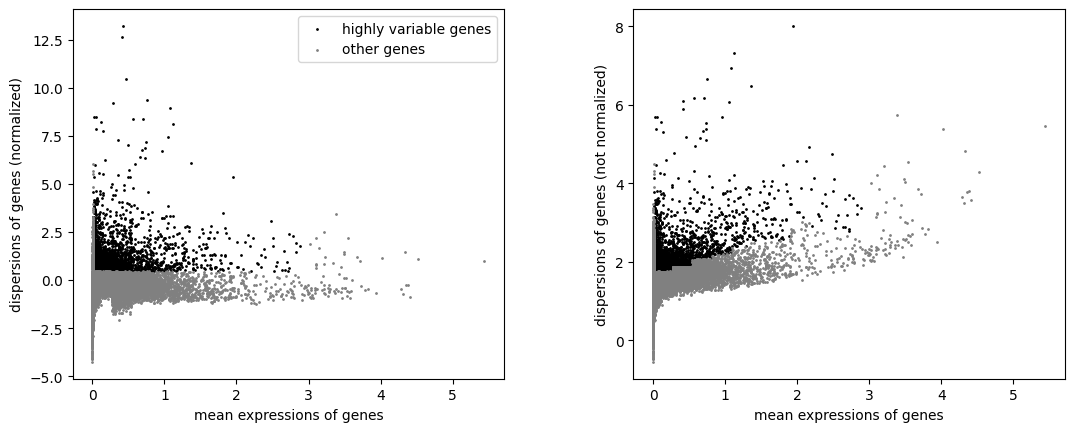

/home/akshatgupta/anaconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [8]:
# Data pre-processing 
# Total-count normalize (library-size correct) to 10,000 reads/cell
sc.pp.normalize_total(combined_adata, target_sum=1e4)

# log transform the data - default is natural log, unless specified otherwise
'''
RNAseq data typically follows a Poisson or negative binomial distribution. The log of those distributions look a lot like a normal distribution. 
When you plot the data from those distributions, it just looks nicer if you plot the data on a log scale -- otherwise you see a bunch of data points 
smooshed together near the axis and a small number of data points with very high counts. The base doesn't matter.
Counts are log transformed for two reasons: the first is to stabilize the variance, as the log transform has the property that it stabilizes the 
variance for random variables whose variance is quadratic in the mean (Bartlett, 1947; Yeo and Johnson, 2000)
'''
sc.pp.log1p(combined_adata)

# # identify highly variable genes.
sc.pp.highly_variable_genes(combined_adata, min_mean=0.0125, max_mean=3, min_disp=0.45) #Absolute value of dispersion is taken, can be seen below.
sc.pl.highly_variable_genes(combined_adata)

# tfs = list(set(combined_adata.var_names).intersection(tfs)) #can use ho_adata or ht_adata - both have the same gene set.
# combined_adata.var.loc[tfs, 'highly_variable'] = True
# # keep only highly variable genes:
combined_adata = combined_adata[:, combined_adata.var['highly_variable']]

# # scale each gene to unit variance
sc.pp.scale(combined_adata)

In [9]:
combined_adata

AnnData object with n_obs × n_vars = 12381 × 3172
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.rb', 'percent.hb', 'umi_per_gene', 'RNA_snn_res.0.8', 'seurat_clusters', 'mt_filter', 'feature_filter', 'doublet_filter', 'qualtiy_filters', 'RNA_snn_res.0.5', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.5', 'integrated_snn_res.1', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'S.Score', 'G2M.Score', 'cell_cycle_seurat', 'cluster1', 'n_genes', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [10]:
combined_adata[combined_adata.obs['sample'] == '6Ho']

View of AnnData object with n_obs × n_vars = 4757 × 3172
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.rb', 'percent.hb', 'umi_per_gene', 'RNA_snn_res.0.8', 'seurat_clusters', 'mt_filter', 'feature_filter', 'doublet_filter', 'qualtiy_filters', 'RNA_snn_res.0.5', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.5', 'integrated_snn_res.1', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'S.Score', 'G2M.Score', 'cell_cycle_seurat', 'cluster1', 'n_genes', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [11]:
combined_adata.var

,highly_variable,means,dispersions,dispersions_norm,mean,std
feature,,,,,,
Chl1,True,0.023469,1.842613,0.634363,0.009817,0.116500
Clec2g,True,0.022573,2.067685,1.093529,0.009566,0.112266
Tlr5,True,0.036059,2.119083,1.198386,0.013750,0.142938
Dscc1,True,0.026305,1.822768,0.593878,0.012623,0.120071
Slc26a11,True,0.065337,1.796069,0.539410,0.028488,0.195436
...,...,...,...,...,...,...
Siglecg,True,0.103052,1.801623,0.550741,0.043881,0.248295
Cd5,True,0.022522,2.521612,2.019579,0.005719,0.111038
Magix,True,0.027738,1.883725,0.718235,0.011031,0.128905


In [23]:
#Save the 6ho data after all preprocessing steps
combined_adata.write_h5ad('../data/combined_data_5ht6ho_intersection_highly_var.h5ad')

# Find highly variable genes for the 6ho ADATA

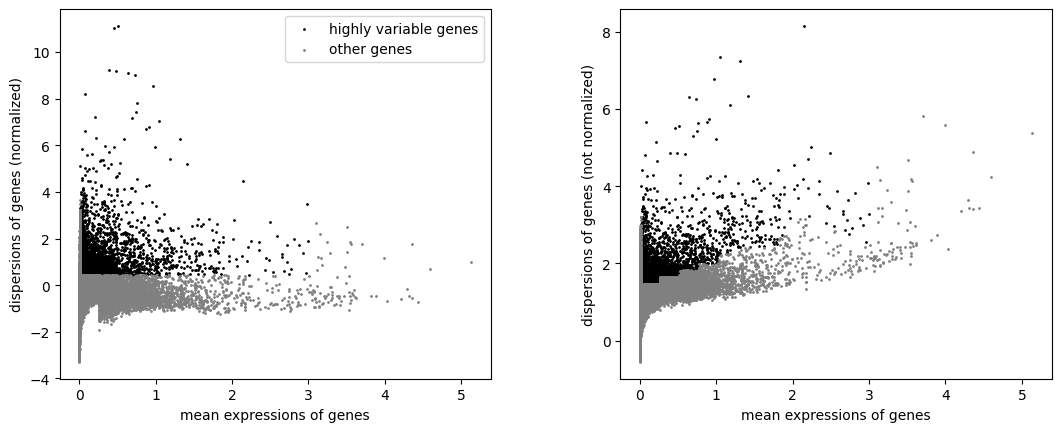

/home/akshatgupta/anaconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
# Total-count normalize (library-size correct) to 10,000 reads/cell
sc.pp.normalize_total(ho_adata, target_sum=1e4)

# log transform the data - default is natural log, unless specified otherwise
'''
RNAseq data typically follows a Poisson or negative binomial distribution. The log of those distributions look a lot like a normal distribution. 
When you plot the data from those distributions, it just looks nicer if you plot the data on a log scale -- otherwise you see a bunch of data points 
smooshed together near the axis and a small number of data points with very high counts. The base doesn't matter.
Counts are log transformed for two reasons: the first is to stabilize the variance, as the log transform has the property that it stabilizes the 
variance for random variables whose variance is quadratic in the mean (Bartlett, 1947; Yeo and Johnson, 2000)
'''
sc.pp.log1p(ho_adata)

# # identify highly variable genes.
sc.pp.highly_variable_genes(ho_adata, min_mean=0.0125, max_mean=3, min_disp=0.45) #Absolute value of dispersionis taken, can be seen below.
sc.pl.highly_variable_genes(ho_adata)

# tfs = list(set(ho_adata.var_names).intersection(tfs)) #can use ho_adata or ht_adata - both have the same gene set.
# ho_adata.var.loc[tfs, 'highly_variable'] = True
# # keep only highly variable genes:
ho_adata = ho_adata[:, ho_adata.var['highly_variable']]

# # scale each gene to unit variance, clip values exceeding SD 10.
sc.pp.scale(ho_adata)

In [14]:
ho_adata.var

,highly_variable,means,dispersions,dispersions_norm,mean,std
feature,,,,,,
Chl1,True,0.021308,1.724073,0.909157,0.009896,0.108885
Tasp1,True,0.049101,1.512283,0.518941,0.024774,0.165651
Sorcs2,True,0.038995,1.755241,0.966584,0.018376,0.145608
Tlr5,True,0.028374,2.014562,1.444373,0.011980,0.125958
Slc26a11,True,0.062198,1.527643,0.547242,0.029172,0.190417
...,...,...,...,...,...,...
Cd5,True,0.020036,2.210952,1.806214,0.005881,0.107348
Magix,True,0.037702,1.523302,0.539243,0.016437,0.152090
Trim30c,True,0.069608,2.137009,1.669976,0.030291,0.195095


In [22]:
#Save the 6ho data after all preprocessing steps
ho_adata.write_h5ad('../data/ho6_preprocessed_intersection_.h5ad')

In [16]:
len(set(ho_adata.var_names).intersection(tfs))

293

# Find highly variable genes for the 5ht ADATA

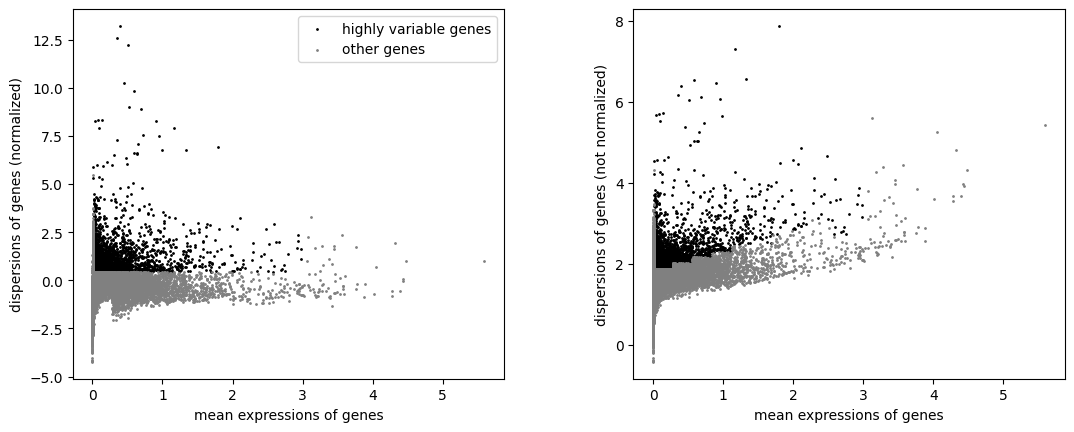

/home/akshatgupta/anaconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
# Total-count normalize (library-size correct) to 10,000 reads/cell
ht_adata.X = ht_adata.X.astype(float)
sc.pp.normalize_per_cell(ht_adata, counts_per_cell_after=1e4)

# # log transform the data.
sc.pp.log1p(ht_adata)

# # identify highly variable genes.
sc.pp.highly_variable_genes(ht_adata, min_mean=0.0125, max_mean=3, min_disp=0.45)
sc.pl.highly_variable_genes(ht_adata)

# tfs = list(set(ht_adata.var_names).intersection(tfs)) 

# ht_adata.var.loc[tfs, 'highly_variable'] = True
# # keep only highly variable genes:
ht_adata = ht_adata[:, ht_adata.var['highly_variable']]

# # scale each gene to unit variance, clip values exceeding SD 10.
sc.pp.scale(ht_adata)

In [18]:
ht_adata.var

,highly_variable,means,dispersions,dispersions_norm,mean,std
feature,,,,,,
Chl1,True,0.024816,1.900756,0.523697,0.009767,0.121016
Clec2g,True,0.026560,2.301449,1.345901,0.009894,0.121607
Tlr5,True,0.040823,2.160887,1.057474,0.014855,0.152576
Dscc1,True,0.028070,2.131734,0.997654,0.011773,0.123956
Slc26a11,True,0.067292,1.923149,0.569647,0.028061,0.198514
...,...,...,...,...,...,...
Cd5,True,0.024070,2.651324,2.063827,0.005618,0.113287
Magix,True,0.021471,2.171679,1.079618,0.007658,0.111913
Fcho1,True,0.037837,1.945617,0.615751,0.015925,0.146574


In [21]:
ht_adata.write_h5ad('../data/ht5_preprocessed_intersection_.h5ad')

In [19]:
#Take union of genes after filtering from both datasets
#ho_adata = sc.read_h5ad('../processed_data/ho6_preprocessed_adata.h5ad')
filtered_genes_after_highly_variable_cutoff = set(ht_adata.var_names).union(ho_adata.var_names)
len(filtered_genes_after_highly_variable_cutoff)

4802